Problem Statement:

A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply. You are a data scientist, who has to
come up with useful insights using the data and make prediction models to forecast the sales for
X number of months/years.

In [1]:
## Import the required libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
## Import the .csv file

In [7]:
df = pd.read_csv('Walmart.csv')

In [6]:
df.shape

(6435, 8)

In [8]:
## Check top 5 rows from the dataset

In [9]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [10]:
## Check the datatype of each column

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [12]:
## Check if any null/missing values in the dataset

In [13]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [14]:
## View the description of the data

In [15]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [17]:
## Identify the outliers using boxplot

int64


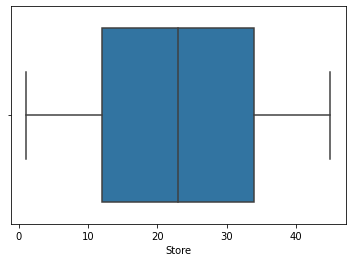

object
float64


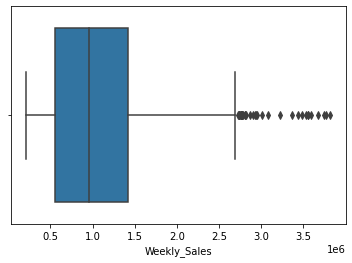

int64


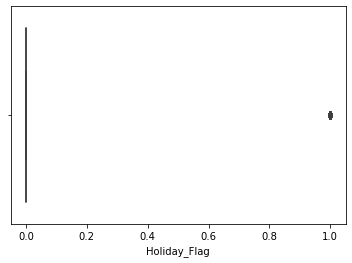

float64


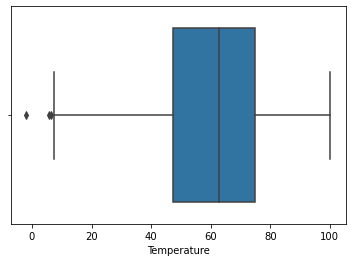

float64


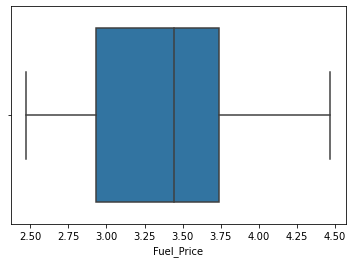

float64


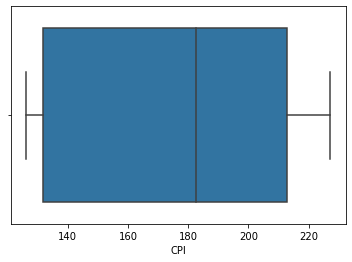

float64


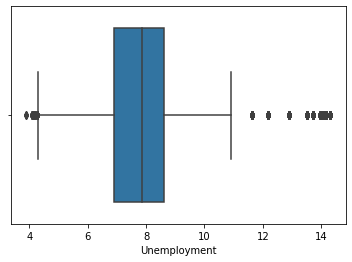

In [22]:
for i in df.columns:
    print(df[i].dtype)
    if(df[i].dtype != 'object'):
        sns.boxplot(df[i])
        plt.show()

In [23]:
## Here Weekly_Sales and Unemployment columns are having outliers and we need to remove those outliers.

In [24]:
def remove(df,column):
    Q1 = np.percentile(df[column],0.25)
    Q3 = np.percentile(df[column],0.75)
    IQR = Q3-Q1
    
    UL = Q3 + 1.5*Q3
    LL = Q1 - 1.5*Q1
    df = df[ (df[column] > LL) & (df[column] < UL)]
    return df

In [26]:
df = remove(df,'Weekly_Sales')

In [27]:
## Check weekly sales column after removing outliers

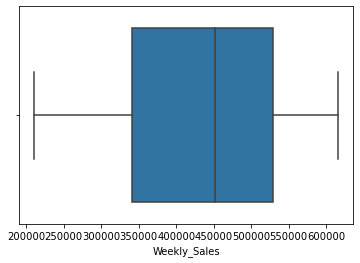

In [28]:
sns.boxplot(df['Weekly_Sales'])
plt.show()

In [29]:
df = remove(df,'Unemployment')

In [30]:
## Check Unemployment column after removing outliers

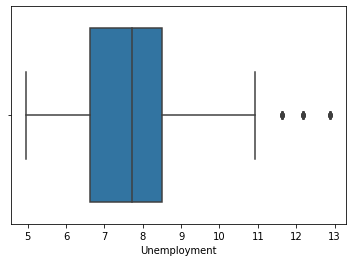

In [31]:
sns.boxplot(df['Unemployment'])
plt.show()

In [32]:
## Check the correlation between each and every column

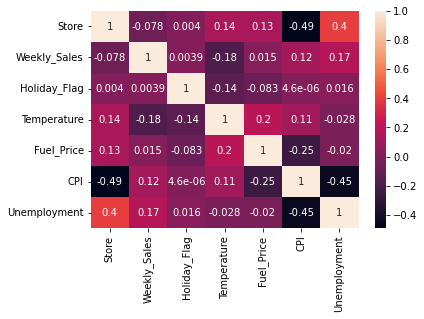

In [33]:
sns.heatmap(df.corr() , annot = True)
plt.show()

In [35]:
## This shows multi-colinearity between features.
## And to understand this in-detail use pairplot or scatterplot.

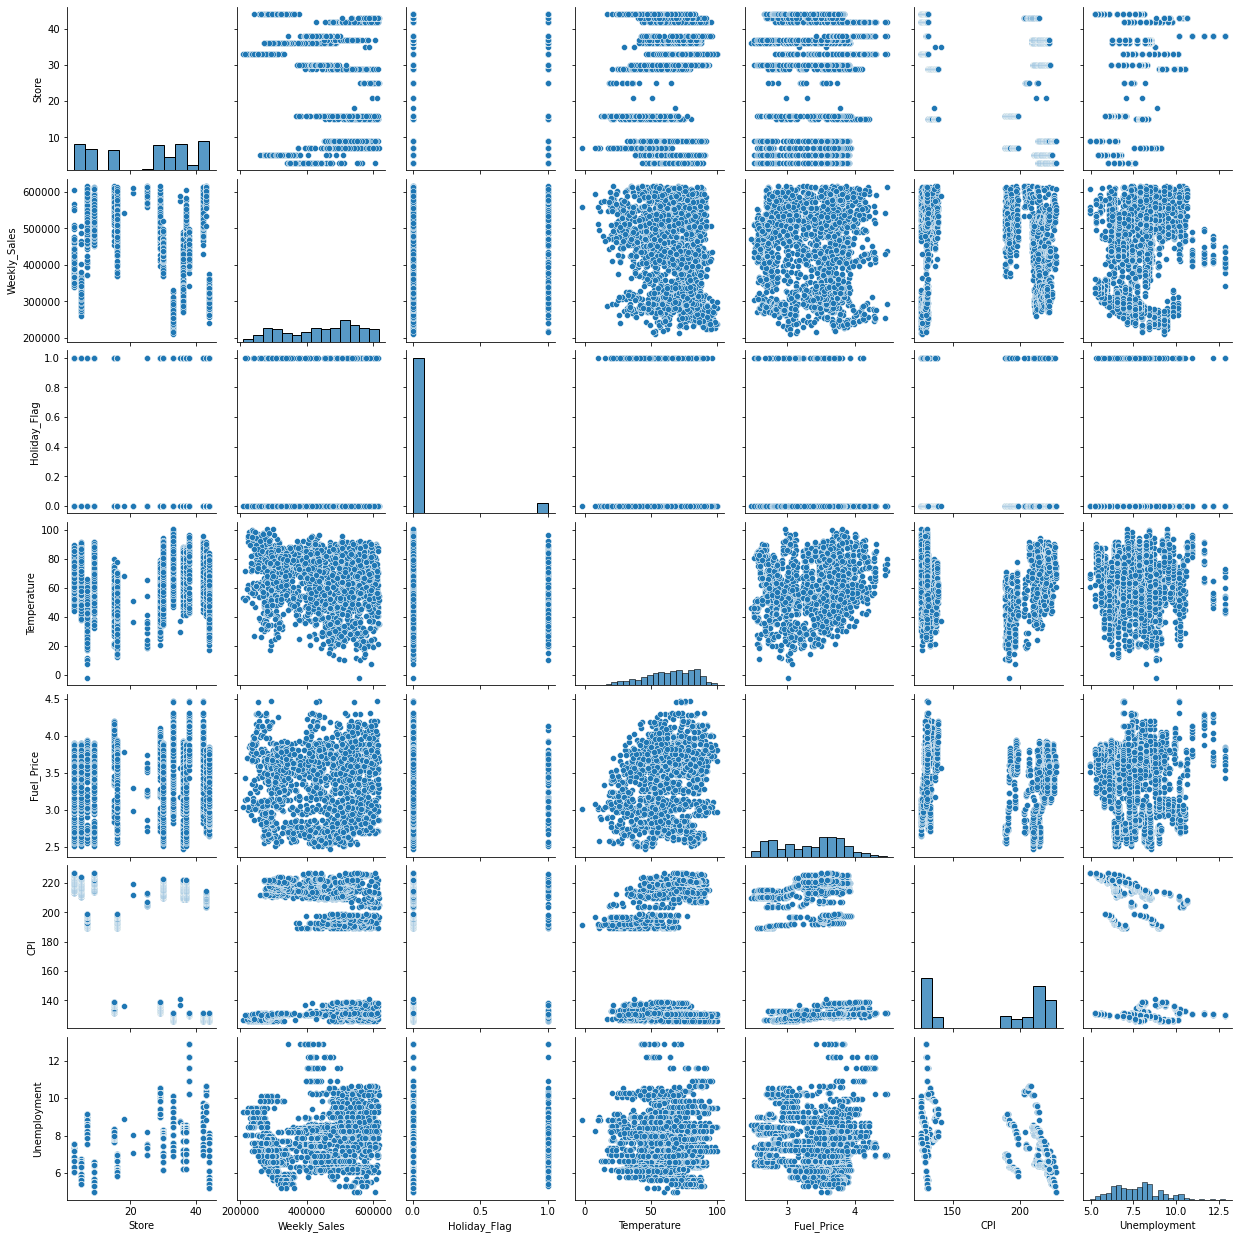

In [36]:
sns.pairplot(df)
plt.show()

In [37]:
## We need to extract the week, month, and year from the Date column.

In [43]:
def extract(df):
    Date = 'Date'
    df[Date] = pd.to_datetime(df[Date], infer_datetime_format = True)
    df['Week'] = pd.DatetimeIndex(df[Date]).week
    df['Month'] = pd.DatetimeIndex(df[Date]).month
    df['Year'] = pd.DatetimeIndex(df[Date]).year
    

In [44]:
extract(df)

In [45]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year
286,3,2010-05-02,461622.22,0,45.71,2.572,214.424881,7.368,17,5,2010
287,3,2010-12-02,420728.96,1,47.93,2.548,214.574792,7.368,48,12,2010
288,3,2010-02-19,421642.19,0,47.07,2.514,214.619887,7.368,7,2,2010
289,3,2010-02-26,407204.86,0,52.05,2.561,214.647513,7.368,8,2,2010
290,3,2010-05-03,415202.04,0,53.04,2.625,214.675139,7.368,18,5,2010


In [46]:
df['Year'].value_counts()

2011    667
2010    589
2012    584
Name: Year, dtype: int64

In [47]:
df['Month'].value_counts()

4     184
10    173
9     171
5     169
7     166
3     158
8     151
2     145
1     145
6     140
12    128
11    110
Name: Month, dtype: int64

In [48]:
## Plot the sales year wise

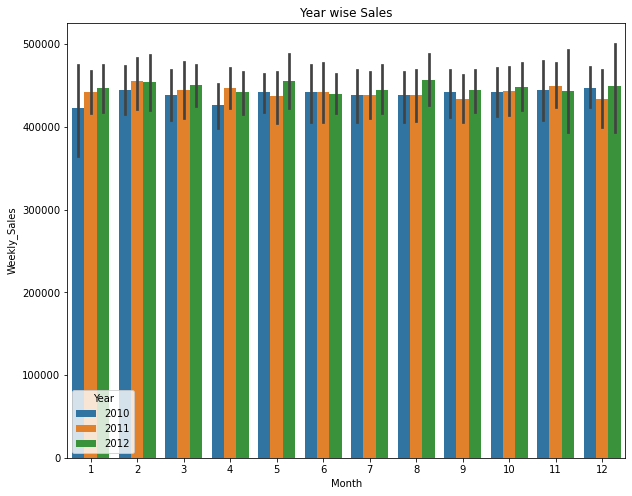

In [51]:
plt.figure(figsize=(10,8))
sns.barplot(data=df , x='Month' , y='Weekly_Sales' , hue='Year')
plt.title('Year wise Sales')
plt.show()

In [52]:
## It shows slight variation in sales with respect to year.

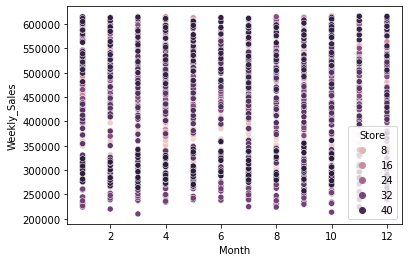

In [53]:
sns.scatterplot(data=df , x='Month' , y='Weekly_Sales' , hue='Store')
plt.show()

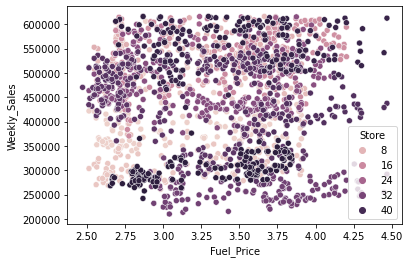

In [54]:
sns.scatterplot(data=df , x='Fuel_Price' , y='Weekly_Sales' , hue='Store')
plt.show()

In [55]:
## This shows that the Sales doesn't depend on Fuel price.

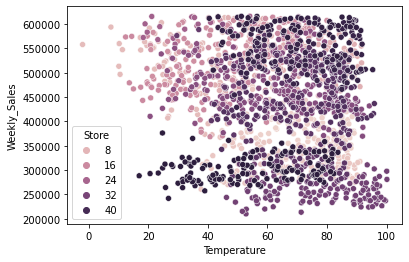

In [56]:
sns.scatterplot(data=df , x='Temperature' , y='Weekly_Sales' , hue='Store')
plt.show()

In [57]:
## This shows that the Sales doesn't depend on temperature.

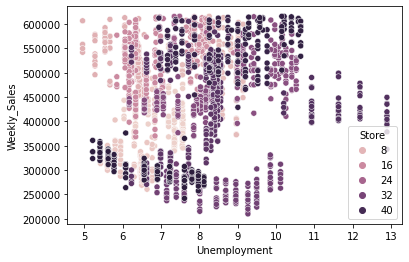

In [58]:
sns.scatterplot(data=df , x='Unemployment' , y='Weekly_Sales' , hue='Store')
plt.show()

In [59]:
## This shows slight variation in Sales as unemployment increases.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1840 entries, 286 to 6291
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         1840 non-null   int64         
 1   Date          1840 non-null   datetime64[ns]
 2   Weekly_Sales  1840 non-null   float64       
 3   Holiday_Flag  1840 non-null   int64         
 4   Temperature   1840 non-null   float64       
 5   Fuel_Price    1840 non-null   float64       
 6   CPI           1840 non-null   float64       
 7   Unemployment  1840 non-null   float64       
 8   Week          1840 non-null   int64         
 9   Month         1840 non-null   int64         
 10  Year          1840 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 237.0 KB


In [61]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year
286,3,2010-05-02,461622.22,0,45.71,2.572,214.424881,7.368,17,5,2010
287,3,2010-12-02,420728.96,1,47.93,2.548,214.574792,7.368,48,12,2010
288,3,2010-02-19,421642.19,0,47.07,2.514,214.619887,7.368,7,2,2010
289,3,2010-02-26,407204.86,0,52.05,2.561,214.647513,7.368,8,2,2010
290,3,2010-05-03,415202.04,0,53.04,2.625,214.675139,7.368,18,5,2010


In [63]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Week', 'Month', 'Year'],
      dtype='object')

In [67]:
## Define the independent and dependent features.

In [65]:
x = df.loc[:, ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week', 'Month', 'Year']]
x

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year
286,3,0,45.71,2.572,214.424881,7.368,17,5,2010
287,3,1,47.93,2.548,214.574792,7.368,48,12,2010
288,3,0,47.07,2.514,214.619887,7.368,7,2,2010
289,3,0,52.05,2.561,214.647513,7.368,8,2,2010
290,3,0,53.04,2.625,214.675139,7.368,18,5,2010
...,...,...,...,...,...,...,...,...,...
6287,44,0,64.80,3.821,131.043000,5.407,39,9,2012
6288,44,0,61.79,3.815,131.075667,5.217,19,5,2012
6289,44,0,55.10,3.797,131.108333,5.217,50,12,2012
6290,44,0,52.06,3.781,131.149968,5.217,42,10,2012


In [66]:
y = df.iloc[: , 2]
y

286     461622.22
287     420728.96
288     421642.19
289     407204.86
290     415202.04
          ...    
6287    355307.94
6288    337390.44
6289    337796.13
6290    323766.77
6291    361067.07
Name: Weekly_Sales, Length: 1840, dtype: float64

In [ ]:
## Split the data into training and testing set

In [68]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2 , random_state=42)

In [69]:
x_train

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year
2008,15,0,44.69,2.960,131.824290,8.350,11,3,2010
2118,15,0,41.57,4.163,137.978133,8.150,17,4,2012
4203,30,0,59.52,3.288,213.477531,8.028,13,4,2011
5984,42,0,80.06,4.277,130.959226,7.382,1,1,2012
6170,44,0,78.82,2.814,126.139200,7.804,5,2,2010
...,...,...,...,...,...,...,...,...,...
4670,33,1,62.35,3.760,129.836400,8.010,47,11,2011
5118,36,0,73.95,3.934,220.120412,6.989,23,6,2012
4113,29,0,41.72,3.876,137.506690,8.988,36,9,2012
5283,37,1,84.19,3.730,221.118114,6.623,28,7,2012


In [70]:
y_train

2008    593710.67
2118    527402.62
4203    443334.71
5984    521953.78
6170    300628.19
          ...    
4670    255996.47
5118    331026.11
4113    504750.35
5283    526838.14
4666    231319.96
Name: Weekly_Sales, Length: 1472, dtype: float64

In [71]:
## Linear Regression Model

In [74]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train , y_train)
pred_lr = lr.predict(x_test)


In [75]:
## Measure some metrics for predicted values and actual values

In [76]:
from sklearn.metrics import mean_squared_error , r2_score

In [77]:
mse = mean_squared_error(y_test , pred_lr)
mse

10223616911.11655

In [78]:
r2 = r2_score(y_test , pred_lr)
r2

0.13271293031460285

In [79]:
## Inference: 13% of the variance present in input features determine the Sales.

In [81]:
## Random Forest Regressor Model

In [91]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)

In [92]:
mse_rf = mean_squared_error(y_test , pred_rf)
mse_rf

1003591097.001027

In [ ]:
r2_score=[]

In [86]:
y_test.shape[0]

368

In [ ]:
rfr=RandomForestRegressor(max_depth=14, random_state=42)

In [96]:
rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=14, random_state=42)

In [97]:
y_pred=rfr.predict(x_test)

In [98]:
print("mean square error is ",mean_squared_error(y_test,y_pred))

mean square error is  1014565068.7661242


In [99]:
y_test.shape

(368,)

In [100]:
x_train.shape

(1472, 9)

In [101]:
y_train.shape

(1472,)

In [102]:
y_train=y_train.values.reshape(y_train.shape[0],1)

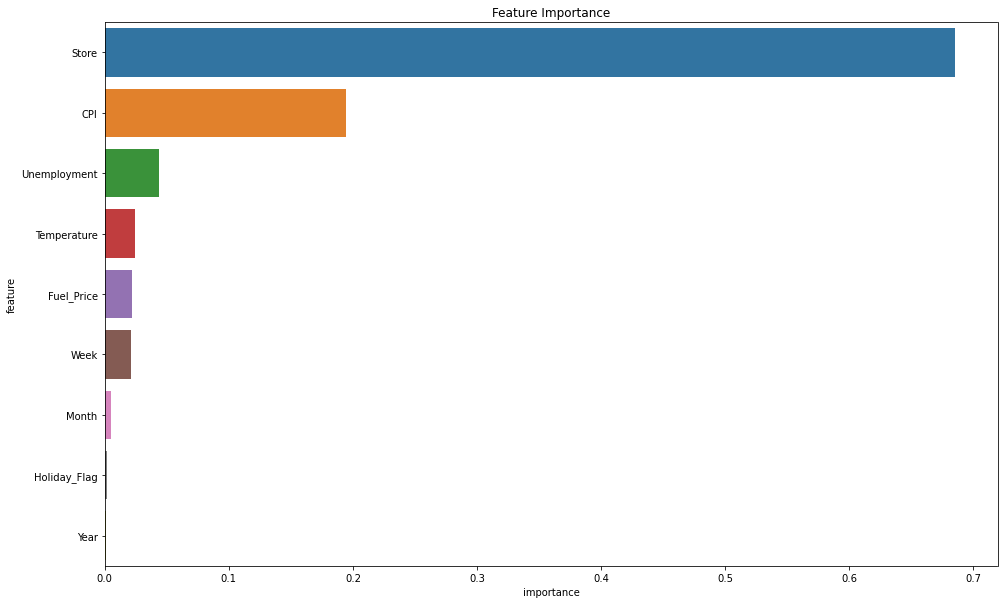

In [103]:
importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': rfr.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

In [104]:
## Decision Tree Model

In [105]:
from sklearn.tree import DecisionTreeRegressor

In [106]:
dtr=DecisionTreeRegressor()

In [107]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [108]:
y_pred=dtr.predict(x_test)

In [109]:
mean_squared_error(y_test,y_pred)

1385897055.9839454

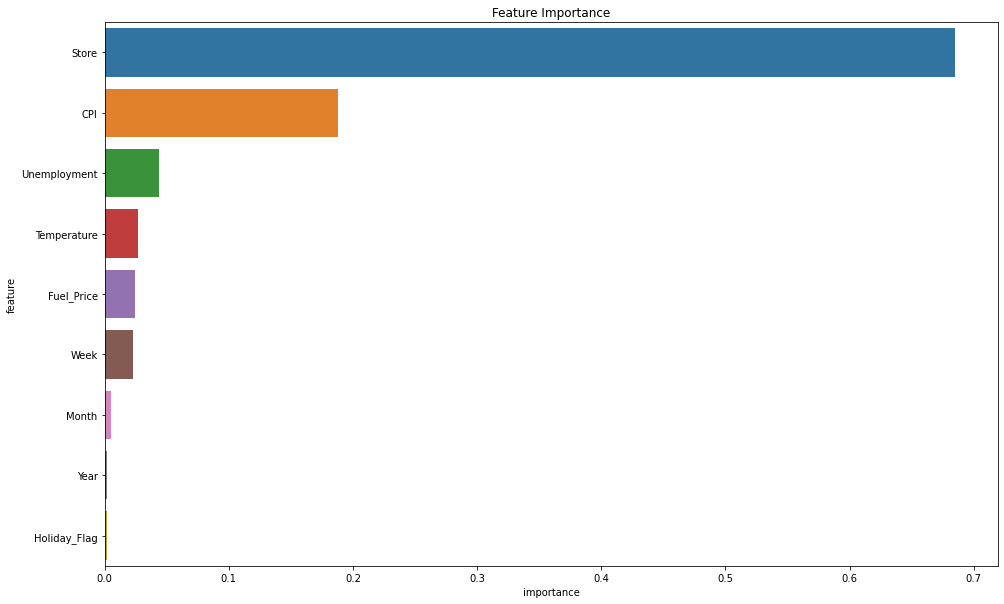

In [110]:
importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': dtr.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');